# Costa Rican Household Poverty Level Prediction

In this assignment, I need to use the variables given to me in the data set to predict what poverty level each of these individuals belong to. Because this is a classification problem, I am going to do a Random Forest algorithm to be able to predict, given a data point's characteristics, what poverty level ("Target") that person should be classified as.

I will go about this in the following steps:
1. Data Cleaning
2. Feature Selection and Engineering
3. Random Forest Modeling  

# 1. Data Cleaning

When we clean data, we want to make sure we fill NaN values or drop the variable if too many are missing. We also want to fix anything that looks erroneous after reviewing the data. 

In [1]:
#import packages needed for using dataframe, running logistic regression, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pprint
from __future__ import division
%matplotlib inline

In [2]:
#read in data sets
train_df = pd.read_csv("/Users/brycebangerter/Documents/Costa_Rica/train.csv")
test_df = pd.read_csv("/Users/brycebangerter/Documents/Costa_Rica/test.csv")

After looking at the data, I found that the train set has one more column of data than the test set, but this is okay, because the train set has a "Target" variable while the test does not, since we are predicting that for the test set. 

In [3]:
#view training data
train_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
#view test data
test_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


Below we see that there are inconsistencies between strings and floats within a column of data. After reading the description of the data on the kaggle website, we can 1 should represent "yes" and 0 should represent "no." I can replace this misrecorded values with the right number and convert the whole column to be a float.

In [5]:
test_df.select_dtypes(include=object)

,Id,idhogar,dependency,edjefe,edjefa
0,ID_2f6873615,72958b30c,.5,no,17
1,ID_1c78846d2,72958b30c,.5,no,17
2,ID_e5442cf6a,72958b30c,.5,no,17
3,ID_a8db26a79,5b598fbc9,no,16,no
4,ID_a62966799,1e2fc704e,8,no,11
5,ID_e77d38d45,8ee7365a8,no,no,11
6,ID_3c5f4bd51,8ee7365a8,no,no,11
7,ID_a849c29bd,ff69a6fc8,no,no,14
8,ID_472fa82da,ff69a6fc8,no,no,14
9,ID_24864adcc,b61e2bb92,8,no,10


In [6]:
train_df.select_dtypes(include=object)

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no
5,ID_ec05b1a7b,2b58d945f,yes,11,no
6,ID_e9e0c1100,2b58d945f,yes,11,no
7,ID_3e04e571e,d6dae86b7,yes,9,no
8,ID_1284f8aad,d6dae86b7,yes,9,no
9,ID_51f52fdd2,d6dae86b7,yes,9,no


In [7]:
#pulled this code from https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough/notebook
#this will fix the inconsistent values (strings and numbers) and replace the "yes" with 1 and "no" with 0
mapping = {"yes": 1, "no": 0}

# Apply same operation to both train and test
for df in [train_df, test_df]:
    # Fill in the values with the correct mapping and convert to float dtype
    df['dependency'] = df['dependency'].replace(mapping).astype(float)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(float)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(float)

Before I do more editing to the data, I want to get a feel for the data and what it represents and what it implies. I will view how households are distributed across the different poverty levels

In [8]:
#view how the poverty classifications are distributed amongst the training data
train_df.Target.value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

I want to check for not just misrecorded data, but missing data. I define a function to find the number of missing values for each column that has missing data.

In [9]:
#defined and ran function to show what variables have missing values and the quanitity of missing values
def show_missing():
    missing = train_df.columns[train_df.isnull().any()].tolist()
    return missing
train_df[show_missing()].isnull().sum()

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

Great, I know how much missing data I have, but it means nothing to me unless I know how many total individuals are in this data set. I want to see the number of individuals to see if the quantity of missing values is significant.

In [10]:
#shows dimensions to tell me how many individuals and variables there are
train_df.shape

(9557, 143)

We can see that v2a1, v18q1, and rez_esc have large amounts of data missing relative to the total number of individuals. I will go ahead and drop rez_esc and v2a1 because it wouldn't be informative to have a variable with a bunch of imputed values.

In [11]:
#drop variable for too many missing values
train_df.drop('rez_esc', axis=1, inplace=True)
#drop variable for too many missing values
train_df.drop('v2a1', axis=1, inplace=True)

Because v18q1 represents the number of tablets owned by the household, it would make sense that a missing value represents a household not having a tablet. In this case, I should fill the NaN values with 0.

In [12]:
#define and perform function to replace missing values with "0"
train_df['v18q1_copy'] = train_df['v18q1']
train_df.v18q1_copy = train_df.v18q1.isna()
def v18q1fix(row):
    if (row["v18q1_copy"]) == True:
        return "0"
    else:
        return (row['v18q1'])
train_df['v18q1_copy'] = train_df.apply(v18q1fix, axis=1)
train_df.drop('v18q1', axis=1, inplace=True)
train_df.rename(columns={'v18q1_copy': 'v18q1'}, inplace=True)
train_df['v18q1'] = train_df['v18q1'].astype(float)

Since there are so few missing values, and meaneduc could be skewed because of an outlier, I use the median of the meaneduc values to fill NaN values with.

In [13]:
#define and perform function to replace missing values with the median of the existing values
train_df['meaneduc_copy'] = train_df['meaneduc']
train_df.meaneduc_copy = train_df.meaneduc.isna()
meaneduc_median = train_df['meaneduc'].median()
def meaneducfix(row):
    if (row["meaneduc_copy"]) == True:
        return meaneduc_median
    else:
        return (row['meaneduc'])
train_df['meaneduc_copy'] = train_df.apply(meaneducfix, axis=1)
train_df.drop('meaneduc', axis=1, inplace=True)
train_df.rename(columns={'meaneduc_copy': 'meaneduc'}, inplace=True)

I will repeat the above steps with the test data set.

In [14]:
#define and perform function to show what variables have missing values and the quanitity of missing values
def show_missing2():
    missing2 = test_df.columns[test_df.isnull().any()].tolist()
    return missing2
test_df[show_missing2()].isnull().sum()

v2a1         17403
v18q1        18126
rez_esc      19653
meaneduc        31
SQBmeaned       31
dtype: int64

In [15]:
test_df.shape

(23856, 142)

In [16]:
#drop variable for too many missing values
test_df.drop('rez_esc', axis=1, inplace=True)
#drop variable for too many missing values
test_df.drop('v2a1', axis=1, inplace=True)

In [17]:
#define and perform function to replace missing values with "0"
test_df['v18q1_copy'] = test_df['v18q1']
test_df.v18q1_copy = test_df.v18q1.isna()
def v18q1fix2(row):
    if (row["v18q1_copy"]) == True:
        return "0"
    else:
        return (row['v18q1'])
test_df['v18q1_copy'] = test_df.apply(v18q1fix2, axis=1)
test_df.drop('v18q1', axis=1, inplace=True)
test_df.rename(columns={'v18q1_copy': 'v18q1'}, inplace=True)

In [18]:
#define and perform function to replace missing values with the median of the existing values
test_df['meaneduc_copy'] = test_df['meaneduc']
test_df.meaneduc_copy = test_df.meaneduc.isna()
meaneduc_median2 = test_df['meaneduc'].median()
def meaneducfix2(row):
    if (row["meaneduc_copy"]) == True:
        return meaneduc_median2
    else:
        return (row['meaneduc'])
test_df['meaneduc_copy'] = test_df.apply(meaneducfix2, axis=1)
test_df.drop('meaneduc', axis=1, inplace=True)
test_df.rename(columns={'meaneduc_copy': 'meaneduc'}, inplace=True)

You will notice that I did not do anything for the SQBmeaned variable. This is because it is just the square of the meaneduc variable, and there are other variables in this data set that are squares of other variables. This is is something I will address in the feature selection and engineering section.

Another thing that we might concerned with is that if people within the same household have different poverty levels since the poverty level is specific to the whole household. I group the households that have the same poverty level for all individuals in the household and also the the households that do not have homogeneous poverty levels across individuals. I then locate these individuals who don't have homogeneous poverty levels with their household members and replace their poverty level with that of the household head, since it represents the household.

In [19]:
# Groupby the household and figure out the number of unique values
all_equal = train_df.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


In [20]:
# Iterate through each household
for household in not_equal.index:
    # Find the correct label (for the head of household)
    true_target = int(train_df[(train_df['idhogar'] == household) & (train_df['parentesco1'] == 1.0)]['Target'])
    
    # Set the correct label for all members in the household
    train_df.loc[train_df['idhogar'] == household, 'Target'] = true_target
    
    
# Groupby the household and figure out the number of unique values
all_equal = train_df.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))


There are 0 households where the family members do not all have the same target.


# 2. Feature Selection and Engineering

This section is where I look at the type of variables in the data set and determine if some are redundant or nonexplanatory and either engineer them to be more useful or drop them completely. Most of what I do here is from looking at the variable names and what they measure and making my decisions off of that. I am not advanced enough to do a bunch of complex visualization and analysis to determine exactly how variables are related and such, although I will attempt some correlation heatmaps to determine the value of some of these variables. 

There are variables in this data set that are squares of other existing variables. This kind of feature engineering is something I don't need right now, and I can always add this later if necessary to improve my model's F1 score. Therefore, I will drop variables that are squares of other variables.

In [21]:
#Removed squared variables because unnecessary
train_df = train_df[train_df.columns.drop(list(train_df.filter(regex='SQ')))]
test_df = test_df[test_df.columns.drop(list(test_df.filter(regex='SQ')))]

I don't need to include "v18q" which is basically a boolean or dummy variable with 0 = "no tablet" and 1 = "tablet" because I already have the "v18q1" variable which measures the number of tablets a household owns, with a value of 0 if they don't own one and a value >0 if they have 1 or more tablets.

In [22]:
#Drop this variable
train_df.drop('v18q', axis=1, inplace=True)
test_df.drop('v18q', axis=1, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Another group of variables that are problematic for the dataset are "tamhog", "r4t3", "hogar_total", "hhsize" and "tamviv" since they all measure relatively the same thing (number of people in household/living in household). Looking at the heatmap we can see that we only need one of these to represent the household size. But which one? After looking to see if there is a significant impact on poverty level by having people who are not a part of the household living in the house, we can see that there is no impact, we are left to choose whatever is most correlated to the "Target" which is "tamviv" by a hair. 

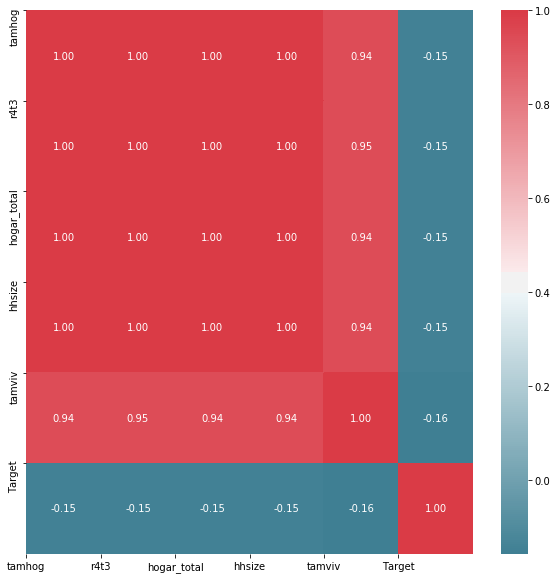

In [23]:
#Had help from this website to code the heatmap: https://www.linkedin.com/pulse/generating-correlation-heatmaps-seaborn-python-andrew-holt/
corrhh = train_df[['tamhog', 'r4t3', 'hogar_total', 'hhsize', 'tamviv', 'Target']].corr()
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrhh, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corrhh.columns)), corrhh.columns);
plt.yticks(range(len(corrhh.columns)), corrhh.columns)
plt.show()

In [24]:
#Create variable that shows the surplus people in the household that are not members of the household
train_df['household_diff'] = train_df['tamviv'] - train_df['tamhog']
#Find correlation between poverty level and surplus people in household
train_df['household_diff'].corr(train_df['Target'])

-0.05810642453552708

In [25]:
#Drop these features plus the new variable I just made
train_df.drop(['tamhog', 'r4t3', 'hogar_total', 'hhsize', 'household_diff'], axis=1, inplace=True)
test_df.drop(['tamhog', 'r4t3', 'hogar_total', 'hhsize'], axis=1, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Another variable that I wish to explore is if having a bathroom is predictive of poverty levels. What I find is that it isn't correlated with poverty level and that there are roughly the same number of households in each category without a bathroom.

In [26]:
#Shows how correlated having a bathroom is with poverty level
train_df['v14a'].corr(train_df['Target'])

0.06332090556598856

In [27]:
#Shows us how many households have or don't have a bathroom within each poverty level group
train_df.groupby(['Target'])['v14a'].value_counts()

Target  v14a
1       1        765
        0          9
2       1       1537
        0         21
3       1       1211
        0         10
4       1       5994
        0         10
Name: v14a, dtype: int64

In [28]:
#Drop this variable
train_df.drop('v14a', axis=1, inplace=True)
test_df.drop('v14a', axis=1, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


There are a lot of data about males and females under and over the age of 12 in the household that can probably be dropped. In fact, after looking at the correlation heatmap, we can say that the number of males and females under 12 is highly correlated with total number under 12 and similarly, the number of males and females over 12 is highly correlated with total number over 12. Total number under 12 has a somewhat strong negative correlation on poverty levels. Therefore, all variables except total number under 12 can be dropped.

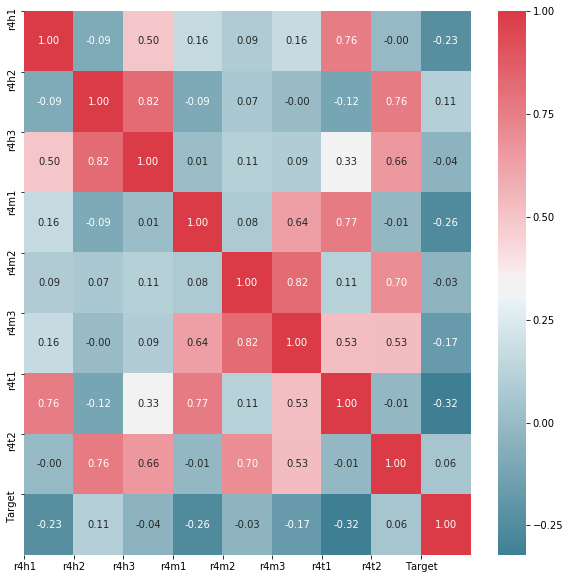

In [29]:
#Had help from this website to code the heatmap: https://www.linkedin.com/pulse/generating-correlation-heatmaps-seaborn-python-andrew-holt/
corr = train_df[['r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'Target']].corr()
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [30]:
#Drop the irrelevant features
train_df.drop(['r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t2'], axis=1, inplace=True)

In [31]:
#Drop the irrelevant features
test_df.drop(['r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t2'], axis=1, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Now I will look at the electricity provider variables and determine if any of them are predictive. I took the four variables and combined them into one ordinal variable, which I got help doing from https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough/notebook.
We can see that there is no correlation between the electricity provider and poverty levels, so these can be dropped.

In [32]:
#Make empty list to append to in function
elec = []
#Iterate through each row and append a corresponding ordinal value depending on what dummy turns on for that individual
for i, row in train_df.iterrows():
    if row['noelec'] == 1:
        elec.append(0)
    elif row['coopele'] == 1:
        elec.append(1)
    elif row['public'] == 1:
        elec.append(2)
    elif row['planpri'] == 1:
        elec.append(3)
    else:
        elec.append(np.nan)
#Add to dataframe
train_df['elec'] = elec

In [33]:
#Correlation coefficient between our new variable and "Target"
train_df['elec'].corr(train_df['Target'])

0.009226496202819292

In [34]:
#Drop these variables since they are not predictive of poverty level
train_df.drop(['elec', 'public', 'planpri', 'coopele', 'noelec'], axis=1, inplace=True)
test_df.drop(['public', 'planpri', 'coopele', 'noelec'], axis=1, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Another group of variables that can be made ordinal is the type of toilet/sewage system in the house. I made a correlation heat map again to determine the order of my ordinal variable values, then I made the new ordinal variable which has a decent correlation to the "Target," so I kept it and dropped the original variables.

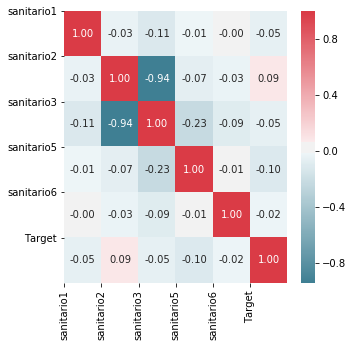

In [35]:
#Had help from this website to code the heatmap: https://www.linkedin.com/pulse/generating-correlation-heatmaps-seaborn-python-andrew-holt/
corrtoi = train_df[['sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6', 'Target']].corr()
fig, ax = plt.subplots(figsize=(5, 5))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrtoi, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corrtoi.columns)), corrtoi.columns);
plt.yticks(range(len(corrtoi.columns)), corrtoi.columns)
plt.show()

In [36]:
#Make empty list to append to in function
toi = []
#Iterate through each row and append a corresponding ordinal value depending on what dummy turns on for that individual
#I chose my ordinal values based on the heatmap with the highest value for the most positively correlated to "Target"
for i, row in train_df.iterrows():
    if row['sanitario1'] == 1:
        toi.append(0)
    elif row['sanitario2'] == 1:
        toi.append(4)
    elif row['sanitario3'] == 1:
        toi.append(2)
    elif row['sanitario5'] == 1:
        toi.append(1)
    elif row['sanitario6'] == 1:
        toi.append(3)
    else:
        toi.append(np.nan)
#Add to dataframe
train_df['toi'] = toi

testtoi = []
for i, row in test_df.iterrows():
    if row['sanitario1'] == 1:
        testtoi.append(0)
    elif row['sanitario2'] == 1:
        testtoi.append(4)
    elif row['sanitario3'] == 1:
        testtoi.append(2)
    elif row['sanitario5'] == 1:
        testtoi.append(1)
    elif row['sanitario6'] == 1:
        testtoi.append(3)
    else:
        testtoi.append(np.nan)
#Add to dataframe
test_df['toi'] = testtoi

#Delete old columns
train_df.drop(['sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6'], axis=1, inplace=True)
test_df.drop(['sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6'], axis=1, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [37]:
#Correlation coefficient to see how good of a predictor this is
train_df['toi'].corr(train_df['Target'])

0.1055076561858318

There are a lot of family role identifiers in this data set that don't really matter when predicting poverty level. I assume this data was collected to just keep track of what the role of each person is in the household (son/daughter, father/mother, etc.) when collecting the data. I only kept parentescol1 because it identifies the individual who is the household head. 

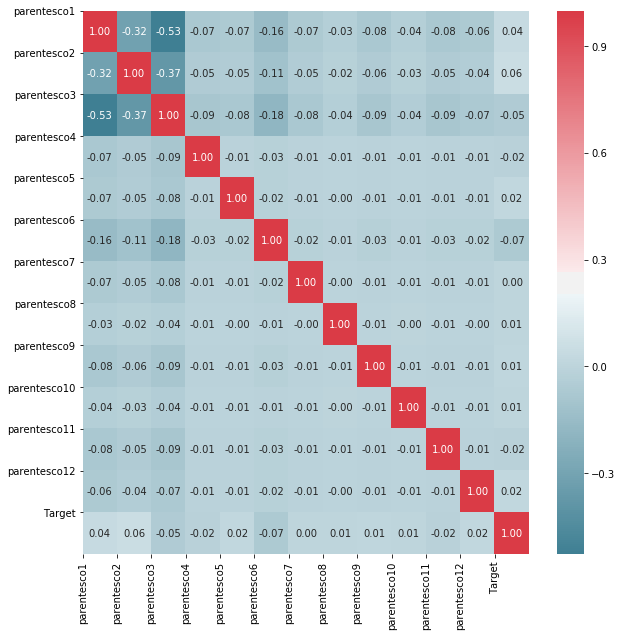

In [38]:
#Had help from this website to code the heatmap: https://www.linkedin.com/pulse/generating-correlation-heatmaps-seaborn-python-andrew-holt/
#Create heatmap to see if correlated to "Target"
corrparent = train_df[['parentesco1', 'parentesco2', 'parentesco3', 'parentesco4', 'parentesco5', 'parentesco6', 'parentesco7', 'parentesco8', 'parentesco9', 'parentesco10', 'parentesco11', 'parentesco12', 'Target']].corr()
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrparent, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corrparent.columns)), corrparent.columns);
plt.yticks(range(len(corrparent.columns)), corrparent.columns)
plt.show()

In [39]:
train_df.drop(['parentesco2', 'parentesco3', 'parentesco4', 'parentesco5', 'parentesco6', 'parentesco7', 'parentesco8', 'parentesco9', 'parentesco10', 'parentesco11', 'parentesco12'], axis=1, inplace=True)

In [40]:
test_df.drop(['parentesco2', 'parentesco3', 'parentesco4', 'parentesco5', 'parentesco6', 'parentesco7', 'parentesco8', 'parentesco9', 'parentesco10', 'parentesco11', 'parentesco12'], axis=1, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


There are two variables "area1" and "area2" which represent if the household is in an urban or rural location, respecively. After looking at the value counts, the two variables are mutually exclusive and collectively exhaustive, meaning we don't need one of them.

In [41]:
train_df['area1'].value_counts()

1    6829
0    2728
Name: area1, dtype: int64

In [42]:
train_df['area2'].value_counts()

0    6829
1    2728
Name: area2, dtype: int64

In [43]:
train_df.drop('area2', axis=1, inplace=True)
test_df.drop('area2', axis=1, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


There is a variable for region the household is located. Because lugar1 is postively correlated to poverty levels and everything else is negatively correlated, I decided to just drop the other variables because if lugar1 = 1, it probably means less poverty, and if lugar1 = 0, it probably means more poverty. I don't need the extra variables to cause the curse of dimensiality.

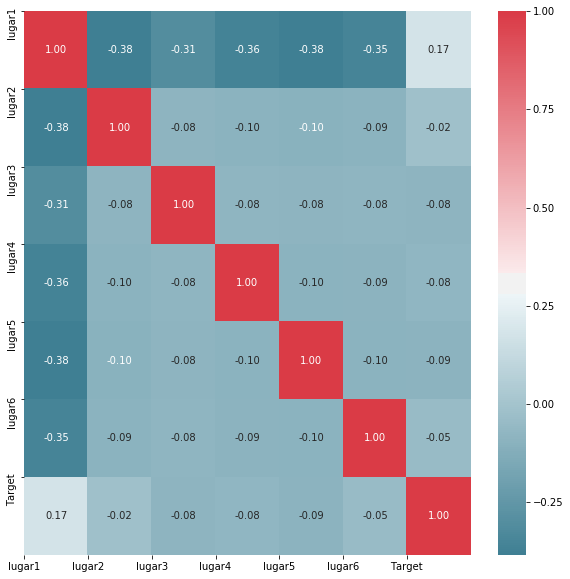

In [44]:
corrregion = train_df[['lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6', 'Target']].corr()
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrregion, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corrregion.columns)), corrregion.columns);
plt.yticks(range(len(corrregion.columns)), corrregion.columns)
plt.show()

In [45]:
train_df.drop(['lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6'], axis=1, inplace=True)
test_df.drop(['lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6'], axis=1, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


The number of phones doesn't mean anything to me. Having one phone might be great if there is only one person in the household, but bad if there are 8 people in the household. Because of this, I care more about the phones per person in the household, so I engineer this feature.

In [46]:
train_df['phoneperperson'] = train_df['qmobilephone']/train_df['tamviv']

In [47]:
test_df['phoneperperson'] = test_df['qmobilephone']/test_df['tamviv']
train_df.drop(['mobilephone', 'qmobilephone'], axis=1, inplace=True)
test_df.drop(['mobilephone', 'qmobilephone'], axis=1, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
train_df['phoneperperson'].corr(train_df['Target'])

0.3618281682764482

These variables below represent whether a household owns, pays a mortgage, pays a rent, and other. Since two of these variables aren't correlated to the poverty level, I drop them and leave the rest.

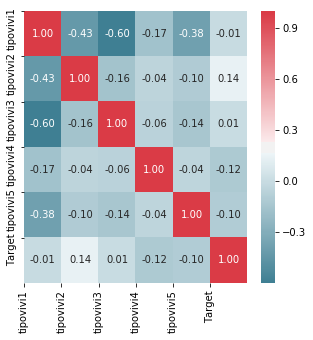

In [49]:
corrtipovivi = train_df[['tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 'Target']].corr()
fig, ax = plt.subplots(figsize=(5, 5))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrtipovivi, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corrtipovivi.columns)), corrtipovivi.columns);
plt.yticks(range(len(corrtipovivi.columns)), corrtipovivi.columns)
plt.show()

In [50]:
train_df.drop(['tipovivi1', 'tipovivi3'], axis=1, inplace=True)
test_df.drop(['tipovivi1', 'tipovivi3'], axis=1, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


These variables for education level are perfect for an ordinal variable to represent all of them. Each variable is moving up the academic ladder, so I can order the variables from 0-8 with 8 being the highest level of educational attainment. It's fairly positively correlated with poverty levels, so I drop the original variables and keep the engineered ordinal variable.

In [51]:
educ = []
for i, row in train_df.iterrows():
    if row['instlevel1'] == 1:
        educ.append(0)
    elif row['instlevel2'] == 1:
        educ.append(1)
    elif row['instlevel3'] == 1:
        educ.append(2)
    elif row['instlevel4'] == 1:
        educ.append(3)
    elif row['instlevel5'] == 1:
        educ.append(4)
    elif row['instlevel6'] == 1:
        educ.append(5)
    elif row['instlevel7'] == 1:
        educ.append(6)
    elif row['instlevel8'] == 1:
        educ.append(7)
    elif row['instlevel9'] == 1:
        educ.append(8)
    else:
        educ.append(np.nan)
#Add to dataframe
train_df['educ'] = educ

In [52]:
train_df['educ'].corr(train_df['Target'])

0.3034951822203205

In [53]:
eductest = []
for i, row in test_df.iterrows():
    if row['instlevel1'] == 1:
        eductest.append(0)
    elif row['instlevel2'] == 1:
        eductest.append(1)
    elif row['instlevel3'] == 1:
        eductest.append(2)
    elif row['instlevel4'] == 1:
        eductest.append(3)
    elif row['instlevel5'] == 1:
        eductest.append(4)
    elif row['instlevel6'] == 1:
        eductest.append(5)
    elif row['instlevel7'] == 1:
        eductest.append(6)
    elif row['instlevel8'] == 1:
        eductest.append(7)
    elif row['instlevel9'] == 1:
        eductest.append(8)
    else:
        eductest.append(np.nan)
#Add to dataframe
test_df['educ'] = eductest
train_df.drop(['instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 'instlevel9'], axis=1, inplace=True)
test_df.drop(['instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 'instlevel9'], axis=1, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


This is a variable for education years for the head of household if that head of household is male. This isn't predictive of poverty levels, so I drop it.

In [54]:
train_df['edjefa'].corr(train_df['Target'])

0.03254459080794048

In [55]:
train_df.drop('edjefa', axis=1, inplace=True)
test_df.drop('edjefa', axis=1, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


The dependency variable is a function of other variables in the data set, so I wanted to see how correlated they were and whether or not to keep the other variables in addition to the dependency variable. After examining the correlation heatmap, hogar_mayor has no correlation to poverty levels and hogar_adul is somewhat correlated to the target variable, but is also correlated to the dependency variable, so I decided to drop both of these variables.

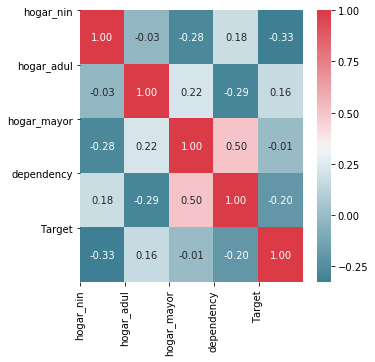

In [56]:
corrhogar = train_df[['hogar_nin', 'hogar_adul', 'hogar_mayor', 'dependency', 'Target']].corr()
fig, ax = plt.subplots(figsize=(5, 5))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrhogar, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corrhogar.columns)), corrhogar.columns);
plt.yticks(range(len(corrhogar.columns)), corrhogar.columns)
plt.show()

In [57]:
train_df.drop(['hogar_mayor', 'hogar_adul'], axis=1, inplace=True)
test_df.drop(['hogar_mayor', 'hogar_adul'], axis=1, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


There is various demographic data about gender and disabilities and none of them are correlated to poverty levels, so I dropped these as well. The data about marital status and family role are mostly uncorrelated to the target variable so I dropped the ones that had low correlations.

In [58]:
train_df['female'].corr(train_df['Target'])

-0.03830665737747855

In [59]:
train_df['male'].corr(train_df['Target'])

0.03830665737747855

In [60]:
train_df['dis'].corr(train_df['Target'])

-0.05586536982870389

In [61]:
train_df.drop(['dis', 'male', 'female'], axis=1, inplace=True)
test_df.drop(['dis', 'male', 'female'], axis=1, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


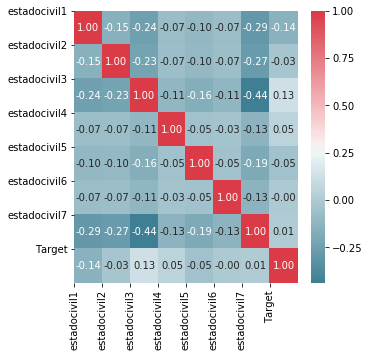

In [62]:
corrdemo = train_df[['estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 'Target']].corr()
fig, ax = plt.subplots(figsize=(5, 5))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrdemo, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corrdemo.columns)), corrdemo.columns);
plt.yticks(range(len(corrdemo.columns)), corrdemo.columns)
plt.show()

In [63]:
train_df.drop(['estadocivil2', 'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7'], axis=1, inplace=True)
test_df.drop(['estadocivil2', 'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7'], axis=1, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


There are other features about the quality of house features that can be turned into ordinal variables.

In [64]:
floors = []
for i, row in train_df.iterrows():
    if row['eviv1'] == 1:
        floors.append(0)
    elif row['eviv2'] == 1:
        floors.append(1)
    elif row['eviv3'] == 1:
        floors.append(2)
    else:
        floors.append(np.nan)
#Add to dataframe
train_df['floors'] = floors
train_df['floors'].corr(train_df['Target'])

0.3053411200239098

In [65]:
floorstest = []
for i, row in test_df.iterrows():
    if row['eviv1'] == 1:
        floorstest.append(0)
    elif row['eviv2'] == 1:
        floorstest.append(1)
    elif row['eviv3'] == 1:
        floorstest.append(2)
    else:
        floorstest.append(np.nan)
#Add to dataframe
test_df['floors'] = floorstest
train_df.drop(['eviv1', 'eviv2', 'eviv3'], axis=1, inplace=True)
test_df.drop(['eviv1', 'eviv2', 'eviv3'], axis=1, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [66]:
roof = []
for i, row in train_df.iterrows():
    if row['etecho1'] == 1:
        roof.append(0)
    elif row['etecho2'] == 1:
        roof.append(1)
    elif row['etecho3'] == 1:
        roof.append(2)
    else:
        roof.append(np.nan)
#Add to dataframe
train_df['roof'] = roof
train_df['roof'].corr(train_df['Target'])

0.27108590727308157

In [67]:
rooftest = []
for i, row in test_df.iterrows():
    if row['etecho1'] == 1:
        rooftest.append(0)
    elif row['etecho2'] == 1:
        rooftest.append(1)
    elif row['etecho3'] == 1:
        rooftest.append(2)
    else:
        rooftest.append(np.nan)
#Add to dataframe
test_df['roof'] = rooftest
train_df.drop(['etecho1', 'etecho2', 'etecho3'], axis=1, inplace=True)
test_df.drop(['etecho1', 'etecho2', 'etecho3'], axis=1, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [68]:
wall = []
for i, row in train_df.iterrows():
    if row['epared1'] == 1:
        wall.append(0)
    elif row['epared2'] == 1:
        wall.append(1)
    elif row['epared3'] == 1:
        wall.append(2)
    else:
        wall.append(np.nan)
#Add to dataframe
train_df['wall'] = wall
train_df['wall'].corr(train_df['Target'])

0.3062546765808888

In [69]:
walltest = []
for i, row in test_df.iterrows():
    if row['epared1'] == 1:
        walltest.append(0)
    elif row['epared2'] == 1:
        walltest.append(1)
    elif row['epared3'] == 1:
        walltest.append(2)
    else:
        walltest.append(np.nan)
#Add to dataframe
test_df['wall'] = walltest
train_df.drop(['epared1', 'epared2', 'epared3'], axis=1, inplace=True)
test_df.drop(['epared1', 'epared2', 'epared3'], axis=1, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


These variables below represent different types of garbage disposals. There are no households where elimbasu5 = 1, so it is dropped. I then look at the correlation heatmap to determine how to value my ordinal variable for the garbage disposals. The new ordinal variable has a decent correlation with the target variable, so I use that and drop the original variables.

In [70]:
train_df['elimbasu5'].value_counts()

0    9557
Name: elimbasu5, dtype: int64

In [71]:
train_df.drop('elimbasu5', axis=1, inplace=True)
test_df.drop('elimbasu5', axis=1, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


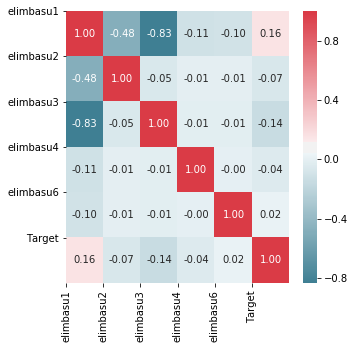

In [72]:
#correlation heatmap
corrdisp = train_df[['elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu6', 'Target']].corr()
fig, ax = plt.subplots(figsize=(5, 5))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrdisp, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corrdisp.columns)), corrdisp.columns);
plt.yticks(range(len(corrdisp.columns)), corrdisp.columns)
plt.show()

In [73]:
disp = []
for i, row in train_df.iterrows():
    if row['elimbasu1'] == 1:
        disp.append(4)
    elif row['elimbasu2'] == 1:
        disp.append(1)
    elif row['elimbasu3'] == 1:
        disp.append(0)
    elif row['elimbasu4'] == 1:
        disp.append(2)
    elif row['elimbasu6'] == 1:
        disp.append(3)
    else:
        disp.append(np.nan)
#Add to dataframe
train_df['disp'] = disp
train_df['disp'].corr(train_df['Target'])

0.16276527307337482

In [74]:
disptest = []
for i, row in test_df.iterrows():
    if row['elimbasu1'] == 1:
        disptest.append(4)
    elif row['elimbasu2'] == 1:
        disptest.append(1)
    elif row['elimbasu3'] == 1:
        disptest.append(0)
    elif row['elimbasu4'] == 1:
        disptest.append(2)
    elif row['elimbasu6'] == 1:
        disptest.append(3)
    else:
        disptest.append(np.nan)
#Add to dataframe
test_df['disp'] = disptest
train_df.drop(['elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu6'], axis=1, inplace=True)
test_df.drop(['elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu6'], axis=1, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


I do a similar process for the main source of energy for cooking variables as I did just above. I make my ordinal variable with just the energcocinar2 and energcocinar4 variables because they have the highest correlation absolute values and energconcinar2 accounts for most of the household's energy source type, so it isn't necessary to include energconcinar1 and energconcinar3 when there are so few households with that type and they don't explain much for our target variable.

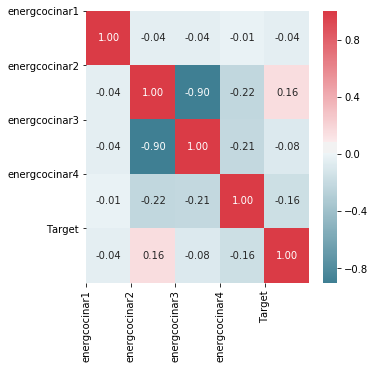

In [75]:
correner = train_df[['energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 'Target']].corr()
fig, ax = plt.subplots(figsize=(5, 5))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correner, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(correner.columns)), correner.columns);
plt.yticks(range(len(correner.columns)), correner.columns)
plt.show()

In [76]:
ener = []
for i, row in train_df.iterrows():
    if row['energcocinar2'] == 1:
        ener.append(1)
    elif row['energcocinar4'] == 1:
        ener.append(0)
    else:
        ener.append(np.nan)
#Add to dataframe
train_df['ener'] = ener
train_df['ener'].corr(train_df['Target'])

0.2625224209524523

In [77]:
enertest = []
for i, row in test_df.iterrows():
    if row['energcocinar2'] == 1:
        enertest.append(1)
    elif row['energcocinar4'] == 1:
        enertest.append(0)
    else:
        enertest.append(np.nan)
#Add to dataframe
test_df['ener'] = enertest
train_df.drop(['energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4'], axis=1, inplace=True)
test_df.drop(['energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4'], axis=1, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


Once again, I use the same process as above for the water source being located inside or outside (or no water source). However, I find that the ordinal variable I created doesn't have a strong correlation with the target variable, so I drop it and all the original water source variables. 

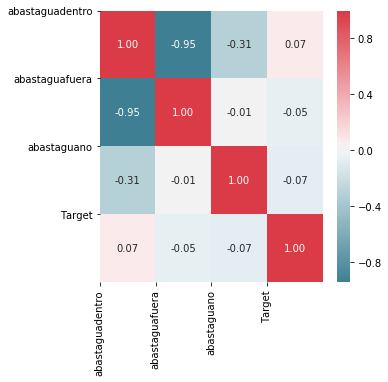

In [78]:
corrwater = train_df[['abastaguadentro', 'abastaguafuera', 'abastaguano', 'Target']].corr()
fig, ax = plt.subplots(figsize=(5, 5))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrwater, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corrwater.columns)), corrwater.columns);
plt.yticks(range(len(corrwater.columns)), corrwater.columns)
plt.show()

In [79]:
water = []
for i, row in train_df.iterrows():
    if row['abastaguano'] == 1:
        water.append(0)
    elif row['abastaguafuera'] == 1:
        water.append(1)
    elif row['abastaguadentro'] == 1:
        water.append(2)
    else:
        water.append(np.nan)
#Add to dataframe
train_df['water'] = water
train_df['water'].corr(train_df['Target'])

0.08170935144490948

In [80]:
train_df.drop(['abastaguano', 'abastaguafuera', 'abastaguadentro', 'water'], axis=1, inplace=True)
test_df.drop(['abastaguano', 'abastaguafuera', 'abastaguadentro'], axis=1, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


For the roof material variables, I use a correlation heatmap and find that none of them correlate with the target variable so I drop them all.

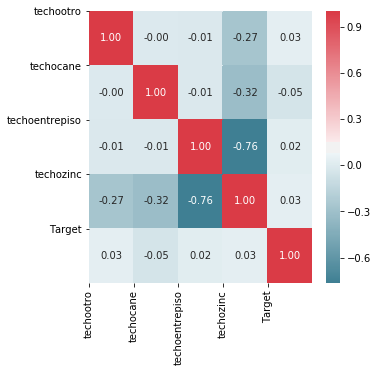

In [81]:
corrroofmat = train_df[['techootro', 'techocane', 'techoentrepiso', 'techozinc', 'Target']].corr()
fig, ax = plt.subplots(figsize=(5, 5))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrroofmat, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corrroofmat.columns)), corrroofmat.columns);
plt.yticks(range(len(corrroofmat.columns)), corrroofmat.columns)
plt.show()

In [82]:
train_df.drop(['techootro', 'techocane', 'techoentrepiso', 'techozinc'], axis=1, inplace=True)
test_df.drop(['techootro', 'techocane', 'techoentrepiso', 'techozinc'], axis=1, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


For the floor material variables, I make a correlation heatmap and make an ordinal variable based on the correlation coefficient values. 

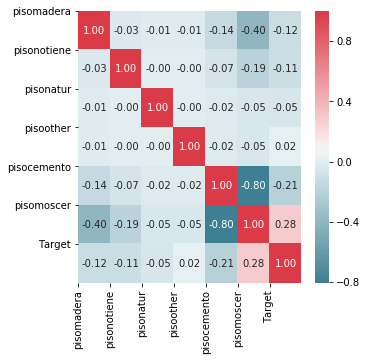

In [83]:
corrfloormat = train_df[['pisomadera', 'pisonotiene', 'pisonatur', 'pisoother', 'pisocemento', 'pisomoscer', 'Target']].corr()
fig, ax = plt.subplots(figsize=(5, 5))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrfloormat, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corrfloormat.columns)), corrfloormat.columns);
plt.yticks(range(len(corrfloormat.columns)), corrfloormat.columns)
plt.show()

In [84]:
floormat = []
for i, row in train_df.iterrows():
    if row['pisomadera'] == 1:
        floormat.append(1)
    elif row['pisonotiene'] == 1:
        floormat.append(2)
    elif row['pisonatur'] == 1:
        floormat.append(3)
    elif row['pisocemento'] == 1:
        floormat.append(0)
    elif row['pisomoscer'] == 1:
        floormat.append(5)
    elif row['pisoother'] == 1:
        floormat.append(4)
    else:
        floormat.append(np.nan)
#Add to dataframe
train_df['floormat'] = floormat
train_df['floormat'].corr(train_df['Target'])

0.27257660197352346

In [85]:
floormattest = []
for i, row in test_df.iterrows():
    if row['pisomadera'] == 1:
        floormattest.append(1)
    elif row['pisonotiene'] == 1:
        floormattest.append(2)
    elif row['pisonatur'] == 1:
        floormattest.append(3)
    elif row['pisocemento'] == 1:
        floormattest.append(0)
    elif row['pisomoscer'] == 1:
        floormattest.append(5)
    elif row['pisoother'] == 1:
        floormattest.append(4)
    else:
        floormattest.append(np.nan)
#Add to dataframe
test_df['floormat'] = floormattest
train_df.drop(['pisomadera', 'pisonotiene', 'pisonatur', 'pisoother', 'pisocemento', 'pisomoscer'], axis=1, inplace=True)
test_df.drop(['pisomadera', 'pisonotiene', 'pisonatur', 'pisoother', 'pisocemento', 'pisomoscer'], axis=1, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Due to our feature engineering, it's possible that there were some individuals who didn't have a value for any of the original variables that turned into the ordinal variable. In other words, rather than receiving some number (ordinal value), they were filled with a NaN. Let's check to see if this happened in our data sets.

In [86]:
train_df[show_missing()].isnull().sum()

educ       3
ener    4399
dtype: int64

In [87]:
test_df[show_missing2()].isnull().sum()

educ        5
disp        4
ener    11430
dtype: int64

It looks like it did, so I am going to have to fill these NaN values with the appropriate values. For educ, I will fill in the NaN with the mode of the data. For ener, I will fill in the NaN with 0. And with disp, I will fill in the Nan with 2.

In [88]:
train_df['educ_copy'] = train_df['educ']
train_df.educ_copy = train_df.educ.isna()
educ_mode = train_df['educ'].mode()
def educfix(row):
    if (row["educ_copy"]) == True:
        return educ_mode
    else:
        return (row['educ'])
train_df['educ_copy'] = train_df.apply(educfix, axis=1)
train_df.drop('educ', axis=1, inplace=True)
train_df.rename(columns={'educ_copy': 'educ'}, inplace=True)

In [89]:
test_df['educ_copy'] = test_df['educ']
test_df.educ_copy = test_df.educ.isna()
educ_mode2 = test_df['educ'].mode()
def educfix2(row):
    if (row["educ_copy"]) == True:
        return educ_mode2
    else:
        return (row['educ'])
test_df['educ_copy'] = test_df.apply(educfix2, axis=1)
test_df.drop('educ', axis=1, inplace=True)
test_df.rename(columns={'educ_copy': 'educ'}, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [90]:
train_df['ener_copy'] = train_df['ener']
train_df.ener_copy = train_df.ener.isna()
def enerfix(row):
    if (row["ener_copy"]) == True:
        return 0
    else:
        return (row['ener'])
train_df['ener_copy'] = train_df.apply(enerfix, axis=1)
train_df.drop('ener', axis=1, inplace=True)
train_df.rename(columns={'ener_copy': 'ener'}, inplace=True)

In [91]:
test_df['ener_copy'] = test_df['ener']
test_df.ener_copy = test_df.ener.isna()
def enerfix2(row):
    if (row["ener_copy"]) == True:
        return 0
    else:
        return (row['ener'])
test_df['ener_copy'] = test_df.apply(enerfix2, axis=1)
test_df.drop('ener', axis=1, inplace=True)
test_df.rename(columns={'ener_copy': 'ener'}, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [92]:
test_df['disp_copy'] = test_df['disp']
test_df.disp_copy = test_df.disp.isna()
def dispfix2(row):
    if (row["disp_copy"]) == True:
        return 2
    else:
        return (row['disp'])
test_df['disp_copy'] = test_df.apply(dispfix2, axis=1)
test_df.drop('disp', axis=1, inplace=True)
test_df.rename(columns={'disp_copy': 'disp'}, inplace=True)

/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

# 3. Random Forest Modeling

Now that I have cleaned the data, selected features, and engineered new ones, I am ready to put the data into a random forest classification model. I will need to import the packages I need from scikitlearn, break up the training data set into train and test subsets to train my model on. In order to run the model on this data, I need to make a new dataframe that doesn't have categorical variables or else the function won't work. 

In [93]:
#import all the scikit learn packages for random forest classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report
from collections import Counter

In [94]:
#Make a df that doesn't have the categorical identification variables so that the random forest can work
df_no_cat = train_df.drop(['Target', 'Id', 'idhogar'], axis=1)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(df_no_cat, train_df.Target, test_size=0.20, random_state=42)

Here I am testing multiple hyperparameters to find the best model. n_estimators is the number of trees I will make in my random forest, max_depth is the deepness of each tree, and class_weights to value the strength of the split. 

I loop through all the hyperparameters and find the hyperparameters that give me the best f1 score, the score that weights how well the model did in precision and recall. The score is not great but let's look at what happens when I predict on the test subset of the training data.

In [97]:
#hyperparameter options to iterate through
n_estimators = [1000, 2500, 5000]
max_depth = [1, 3, 5, 10]
class_weights = ['balanced', None]
#this is the value that will be adjusted as the loop is executed to get the best f1 score
best_f1 = 0
#loop through all hyperparameter options for random forest classification and then the best parameters can be chosen
for est in n_estimators:
    for depth in max_depth:
        for wgt in class_weights:
            print(est, depth, wgt)
            clf = RandomForestClassifier(n_estimators=est, max_depth=depth, oob_score=True, class_weight=wgt)
            clf.fit(X_train, y_train)
            #chose to use average='micro' because it defaults to binary but our target variable isn't binary, and the other options took to long to run on my old computer
            f1 = f1_score(y_train, np.argmax(clf.oob_decision_function_ , 1), average='micro')
            if f1 > best_f1:
                best_f1 = f1
                best_params = (est, depth, wgt)

1000 1 balanced
1000 1 None
1000 3 balanced
1000 3 None
1000 5 balanced
1000 5 None
1000 10 balanced
1000 10 None
2500 1 balanced
2500 1 None
2500 3 balanced
2500 3 None
2500 5 balanced
2500 5 None
2500 10 balanced
2500 10 None
5000 1 balanced
5000 1 None
5000 3 balanced
5000 3 None
5000 5 balanced
5000 5 None
5000 10 balanced
5000 10 None


In [98]:
print("Best OOB F1: {}".format(best_f1))
print("Best params: {}".format(best_params))

Best OOB F1: 0.13760627861347285
Best params: (5000, 3, None)


Below we can see how well the model did with precision, recall, and f1 score for each poverty level classification. We can see that the precision and recall for poverty levels 1 and 3 are 0. This means our model is not predicting people to be in a poverty class of 1 or 3. It's having a hard time making accurate predictions. We can also see that the recall for poverty class 4 is really good, but the precision isn't. Perhaps the model overclassifies households to this poverty class such that we predicted true positives equal the amount of true positives in the data set, but it tries too hard which is why we get a lot of false positives, bringing our precision down. For the sake of time, I do not have the opportunity to explore this further and change my features, hyperparameters, or average strategy in the f1 score calculation. I'm going to use this model to predict my test_df poverty levels.

In [113]:
clf = RandomForestClassifier(n_estimators=best_params[0], max_depth=best_params[1], class_weight=best_params[2])
clf.fit(X_train, y_train)
test_predictions = clf.predict(X_test)
print("Test Classification Report:")
print(classification_report(y_test, test_predictions))

Test Classification Report:
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       169
          2       0.46      0.11      0.18       302
          3       0.00      0.00      0.00       257
          4       0.64      0.99      0.78      1184

avg / total       0.47      0.63      0.51      1912



/Users/brycebangerter/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Here I make a dataframe of the test data without the categorical variables, use my model to predict the poverty classifcation of the test data, and display the predictions. We can see that it looks similar to what happened with the training data, where only poverty classes 2 and 4 were predicted. This model is not very good. However, I did learn a lot about how to do feature selection and engineering and get some experiencing using a random forest classification model, which will come in handy for my project in this class, as we are dealing with a classification problem. 

In [114]:
#make dataframe with no categorical variables
test_no_cat = test_df.drop(['Id', 'idhogar'], axis=1)
#make prediction on test data
test_predictions2 = clf.predict(test_no_cat)

In [115]:
df_test_target = pd.DataFrame(test_predictions2)

In [116]:
#How many of each household was predicted
df_test_target[0].value_counts()

4    22444
2     1412
Name: 0, dtype: int64